In [29]:
%matplotlib inline
import twitter

CONSUMER_KEY = 'PF525HzHZvTa8F8S0TsAFk50D'
CONSUMER_SECRET = 'mUv1a7uPjyTmNGrAjwwitPpTu8jL3xBALV4Otx2wEyZHJo1yGU'
OAUTH_TOKEN = '49642253-AVFwpXQNldYxtzyd4vb5rGEJWKagtiUZzSlHlLK7k'
OAUTH_TOKEN_SECRET = 'k0wnPwAyUh9TgtY58PnvxaGlL1QSgod08uUy0u4DF65pE'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth = auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable
print twitter_api

In [30]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id = US_WOE_ID)

print world_trends
print
print US_WOE_ID

[{u'created_at': u'2016-02-10T21:23:25Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23ApuracaoRJ', u'query': u'%23ApuracaoRJ', u'tweet_volume': 126503, u'name': u'#ApuracaoRJ', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23Sanremo2016', u'query': u'%23Sanremo2016', u'tweet_volume': 440394, u'name': u'#Sanremo2016', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=Portela', u'query': u'Portela', u'tweet_volume': 93873, u'name': u'Portela', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23whywebelieveinlarry', u'query': u'%23whywebelieveinlarry', u'tweet_volume': 228268, u'name': u'#whywebelieveinlarry', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23WeMissYouLiam', u'query': u'%23WeMissYouLiam', u'tweet_volume': 134286, u'name': u'#WeMissYouLiam', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23IAlwaysGetAnnoyedWhen', u'query': u'%23IAlwaysGetAnnoyedWhen', u'tweet_volume

In [31]:
import json

#print json.dumps(world_trends, indent =1)
#print
#print json.dumps(us_trends, indent =1)

In [32]:
world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name'] for trend in us_trends[0]['trends']])

common_trends_set = world_trends_set.intersection(us_trends_set)

print common_trends_set

set([u'#WeMissYouLiam', u'#My5WordCampaignPromise', u'#IfIHadTrumpsMoney', u'#SELFIEFORSEB', u'#whywebelieveinlarry', u'Carly Fiorina', u'#IAlwaysGetAnnoyedWhen'])


In [33]:
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#HighlyProbableQuotes'
count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count= count)
statuses = search_results['statuses']

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e:
        break
    
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&") ])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 73
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @Honest_Hillary: \"Fine, the 'women demographic' rejected me. Fuck 'em. Who's next on the pander list?\" #HighlyProbableQuotes https://t.c\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 697531938123329536, 
 "favorite_count": 0, 
 "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
 "retweeted": false, 
 "coordinates": null, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 4057313892, 
    "indices": [
     3, 
     18
    ], 
    "id_str": "4057313892", 
    "screen_name": "Honest_Hillary", 
    "name": "Honest Hillary"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     106, 
     127
    ], 
    "text": "HighlyProbableQuotes"
   }
  ], 
  "urls": [], 
  "media": [
   {
    "source_user_id": 4057313892, 
    "source_status_id_str": "697432146483421185", 
    "expanded_url": "http://twitter.com/Honest_Hillary/status/69

In [34]:
print json.dumps(statuses[0]['entities'], indent=1)

{
 "symbols": [], 
 "user_mentions": [
  {
   "id": 4057313892, 
   "indices": [
    3, 
    18
   ], 
   "id_str": "4057313892", 
   "screen_name": "Honest_Hillary", 
   "name": "Honest Hillary"
  }
 ], 
 "hashtags": [
  {
   "indices": [
    106, 
    127
   ], 
   "text": "HighlyProbableQuotes"
  }
 ], 
 "urls": [], 
 "media": [
  {
   "source_user_id": 4057313892, 
   "source_status_id_str": "697432146483421185", 
   "expanded_url": "http://twitter.com/Honest_Hillary/status/697432146483421185/photo/1", 
   "display_url": "pic.twitter.com/VoWol3X6FC", 
   "url": "https://t.co/VoWol3X6FC", 
   "media_url_https": "https://pbs.twimg.com/media/Ca3G12WUsAAhoVy.jpg", 
   "source_user_id_str": "4057313892", 
   "source_status_id": 697432146483421185, 
   "id_str": "697432145736806400", 
   "sizes": {
    "large": {
     "h": 640, 
     "resize": "fit", 
     "w": 640
    }, 
    "small": {
     "h": 340, 
     "resize": "fit", 
     "w": 340
    }, 
    "medium": {
     "h": 600, 
     "re

In [35]:
status_texts = [ status['text'] for status in statuses]
screen_names = [ user_mention['screen_name'] for status in statuses for user_mention in status['entities']['user_mentions']]
hashtags = [ hashtag['text'] for status in statuses for hashtag in status['entities']['hashtags']]

words = [w for t in status_texts for w in t.split()]

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @Honest_Hillary: \"Fine, the 'women demographic' rejected me. Fuck 'em. Who's next on the pander list?\" #HighlyProbableQuotes https://t.c\u2026", 
 "#HighlyProbableQuotes\n\n\"I Never fucking said that!!!\"\n\n--Jesus, Mohammed, Moses,\nBuddha &amp; Krishna https://t.co/ZFsy2G0gDC", 
 "RT @BROADSIDED55: #HighlyProbableQuotes \"Just Once...In College\" https://t.co/4Ghw1f3Clp", 
 "RT ColonialLife \"RT WorkLifeTweets: #HighlyProbableQuotes I'm too healthy for disability insurance: \n\u2026 https://t.co/q1hHehsUda\"", 
 "#HighlyProbableQuotes ho ho ho...I was actually telling Rudolph to get me to the bunny ranch\nSanta"
]
[
 "Honest_Hillary", 
 "BROADSIDED55", 
 "LVGambler123", 
 "enyawkram", 
 "EternalFatKid"
]
[
 "HighlyProbableQuotes", 
 "HighlyProbableQuotes", 
 "HighlyProbableQuotes", 
 "HighlyProbableQuotes", 
 "HighlyProbableQuotes"
]
[
 "RT", 
 "@Honest_Hillary:", 
 "\"Fine,", 
 "the", 
 "'women"
]


In [36]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10]
    print

[(u'#HighlyProbableQuotes', 65), (u'RT', 52), (u'to', 26), (u'the', 18), (u'I', 14), (u"I'm", 12), (u'-', 12), (u'for', 10), (u'you', 9), (u'be', 8)]

[(u'RedNationRising', 7), (u'tlcprincess', 5), (u'The_CDA', 4), (u'darrynzewalk', 3), (u'Honest_Hillary', 3), (u'RottenBroadway', 3), (u'sofarrsogud', 2), (u'booking_buddy', 2), (u'WorkLifeTweets', 2), (u'EternalFatKid', 2)]

[(u'HighlyProbableQuotes', 71), (u'AshWednesday', 3), (u'God', 3), (u'My5WordCampaignPromise', 2), (u'highlyprobablequotes', 2), (u'nature', 1), (u'johnmuir', 1), (u'NO', 1), (u'true', 1)]



In [37]:
from prettytable import PrettyTable

for label, data in (('Word', words), ('Screen Name', screen_names), ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [pt.add_row(kv) for kv in c.most_common()[:10]]
    pt.align[label], pt.align['Count'] = 'l', 'r' 
    print pt

+-----------------------+-------+
| Word                  | Count |
+-----------------------+-------+
| #HighlyProbableQuotes |    65 |
| RT                    |    52 |
| to                    |    26 |
| the                   |    18 |
| I                     |    14 |
| I'm                   |    12 |
| -                     |    12 |
| for                   |    10 |
| you                   |     9 |
| be                    |     8 |
+-----------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| RedNationRising |     7 |
| tlcprincess     |     5 |
| The_CDA         |     4 |
| darrynzewalk    |     3 |
| Honest_Hillary  |     3 |
| RottenBroadway  |     3 |
| sofarrsogud     |     2 |
| booking_buddy   |     2 |
| WorkLifeTweets  |     2 |
| EternalFatKid   |     2 |
+-----------------+-------+
+------------------------+-------+
| Hashtag                | Count |
+------------------------+-------+
| HighlyProbableQuotes   | 

In [38]:
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses])
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.476801579467
0.597014925373
0.105882352941
13.8767123288


In [39]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 86    | RedNationRising | RT @RedNationRising: Why do we need to vote?       |
|       |                 | I'm entitled to be our next president!             |
|       |                 | #HighlyProbableQuotes https://t.co/bAC9zAG537      |
| 86    | RedNationRising | RT @RedNationRising: Why do we need to vote?       |
|       |                 | I'm entitled to be our next president!             |
|       |                 | #HighlyProbableQuotes https://t.co/bAC9zAG537      |
| 86    | RedNationRising | RT @RedNationRising: Why do we need to vote?       |
|       |                 | I'm entitled to be our next president!             |
|       |                 | #HighlyProbableQuotes https://t.co/bAC9zAG537      |
| 86    | RedNationRising | 

In [40]:
#_retweets = twitter_api.statuses.retweets(id=317127304981667841)
#print [r['user']['screen_name'] for r in _retweets]

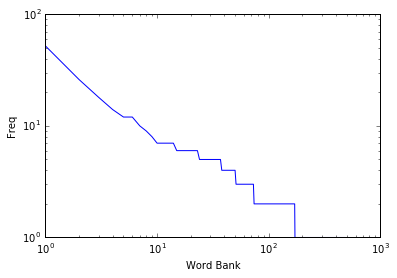

In [42]:
import matplotlib.pyplot as plt
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Bank")

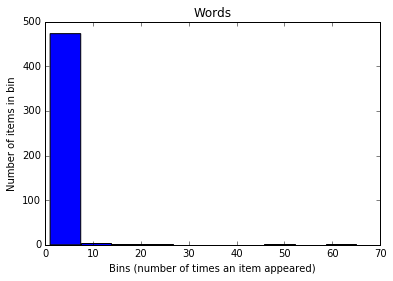

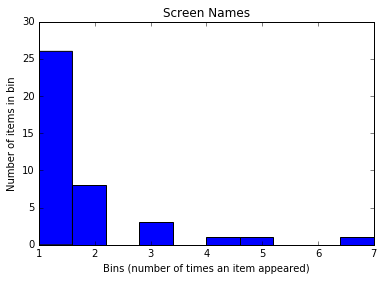

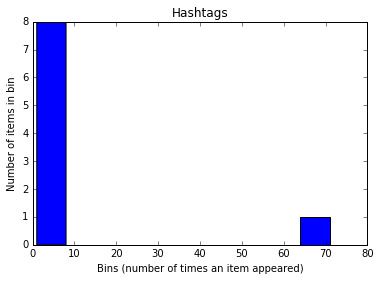

In [43]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

[14, 18, 1, 2, 8, 2, 18, 2, 24, 16, 8, 6, 4, 16, 12, 11, 1, 2, 32, 1, 16, 1, 13, 1, 13, 19, 67, 8, 3, 2, 86, 86, 86, 86, 19, 38, 4, 12, 1, 13, 16, 1, 1, 38, 1, 38, 4, 67, 7, 7, 86]


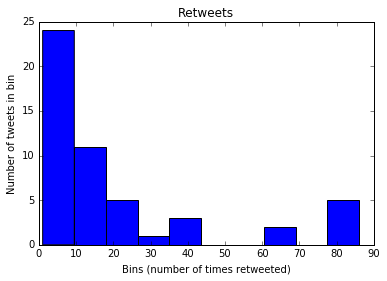

In [44]:
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts